# NETFLIX CONTENT STRATEGY ANALYSIS

### Content Strategy Analysis: Analyzing how content is created, released, distributed, and consumed to achieve specific goals, such as maximizing audience engagement, viewership, brand reach, or revenue.

#### Importing Libraries And Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
netflix_data = pd.read_csv("assets/netflix_content_2023.csv")

netflix_data.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"66,51,00,000",English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,"62,28,00,000",Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,"50,77,00,000",English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"50,30,00,000",English,Movie


In [2]:
netflix_data.dtypes

Title                  object
Available Globally?    object
Release Date           object
Hours Viewed           object
Language Indicator     object
Content Type           object
dtype: object

#### Cleaning and preprocessing the “Hours Viewed” column to prepare it for analysis

In [3]:
netflix_data['Hours Viewed'] = netflix_data['Hours Viewed'].replace(',', '', regex=True).astype(float)

netflix_data[['Title', 'Hours Viewed']].head()

,Title,Hours Viewed
0,The Night Agent: Season 1,812100000.0
1,Ginny & Georgia: Season 2,665100000.0
2,The Glory: Season 1 // 더 글로리: 시즌 1,622800000.0
3,Wednesday: Season 1,507700000.0
4,Queen Charlotte: A Bridgerton Story,503000000.0


#### Analyzing trends in content type to determine whether shows or movies dominate viewership. Visualizing the distribution of total viewership hours between Shows and Movies

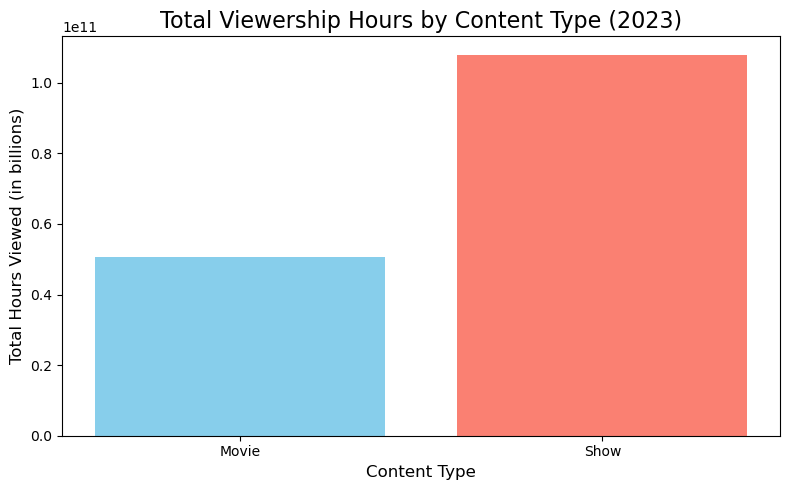

In [4]:
content_type_viewership = netflix_data.groupby('Content Type')['Hours Viewed'].sum()

plt.figure(figsize=(8, 5))
plt.bar(content_type_viewership.index, content_type_viewership.values, color=['skyblue', 'salmon'])

plt.title('Total Viewership Hours by Content Type (2023)', fontsize=16)
plt.xlabel('Content Type', fontsize=12)
plt.ylabel('Total Hours Viewed (in billions)', fontsize=12)

plt.xticks(rotation=0)

plt.tight_layout()  
plt.show()

#### The visualization indicates that shows dominate the total viewership hours on Netflix in 2023 compared to movies. This suggests that Netflix’s content strategy leans heavily toward shows, as they tend to attract more watch hours overall.

#### Analyzing the distribution of viewership across different languages to understand which languages are contributing the most to Netflix’s content consumption

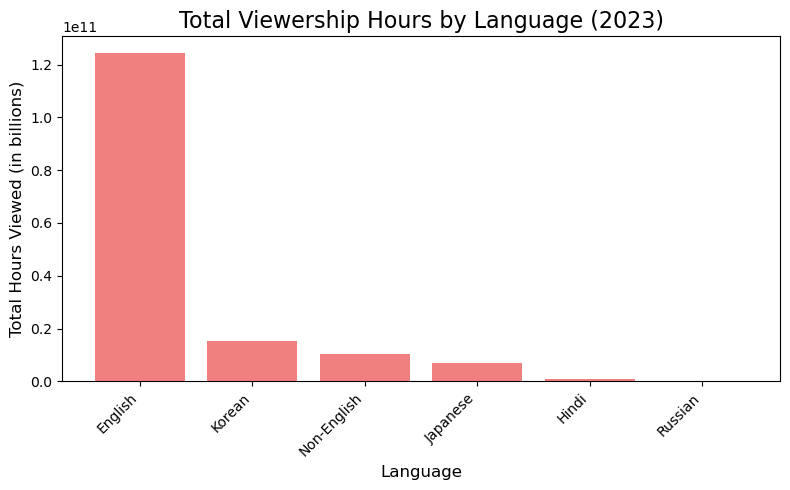

In [5]:
language_viewership = netflix_data.groupby('Language Indicator')['Hours Viewed'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
plt.bar(language_viewership.index, language_viewership.values, color='lightcoral')

plt.title('Total Viewership Hours by Language (2023)', fontsize=16)
plt.xlabel('Language', fontsize=12)
plt.ylabel('Total Hours Viewed (in billions)', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.tight_layout() 
plt.show()

#### The visualization reveals that English-language content significantly dominates Netflix’s viewership, followed by other languages like Korean. It indicates that Netflix’s primary audience is consuming English content, although non-English shows and movies also have a considerable viewership share, which shows a diverse content strategy.

#### Analyzing how viewership varies based on release dates to identify any trends over time, such as seasonality or patterns around specific months

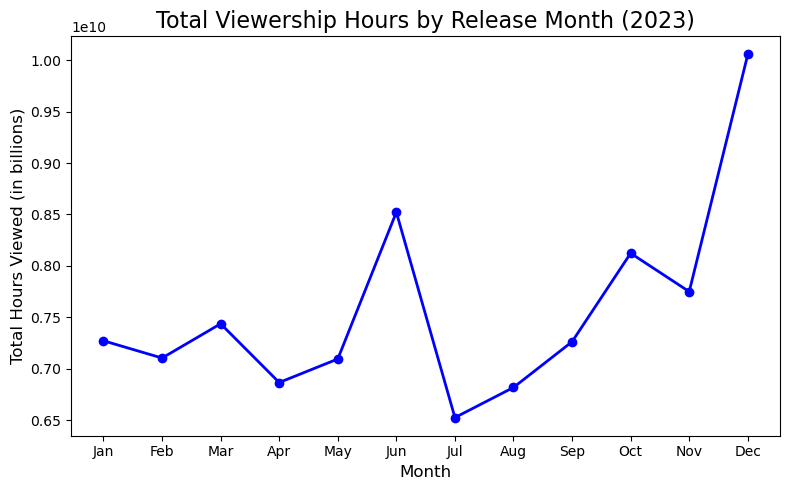

In [6]:
netflix_data['Release Date'] = pd.to_datetime(netflix_data['Release Date'])
netflix_data['Release Month'] = netflix_data['Release Date'].dt.month

monthly_viewership = netflix_data.groupby('Release Month')['Hours Viewed'].sum()

plt.figure(figsize=(8, 5))
plt.plot(monthly_viewership.index, monthly_viewership.values, marker='o', color='blue', linestyle='-', linewidth=2)

plt.title('Total Viewership Hours by Release Month (2023)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Hours Viewed (in billions)', fontsize=12)

plt.xticks(ticks=list(range(1, 13)), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.tight_layout() 
plt.show()

#### The graph shows the total viewership hours by month, which reveals a notable increase in viewership during June and a sharp rise toward the end of the year in December. It suggests that Netflix experiences spikes in audience engagement during these periods, possibly due to strategic content releases, seasonal trends, or holidays, while the middle months have a steady but lower viewership pattern.

#### Analyzing the most successful content (both shows and movies) and understand the specific characteristics, such as genre or theme, that may have contributed to high viewership

In [7]:
top_5_titles = netflix_data.nlargest(5, 'Hours Viewed')

top_5_titles[['Title', 'Hours Viewed', 'Language Indicator', 'Content Type', 'Release Date']]

,Title,Hours Viewed,Language Indicator,Content Type,Release Date
0,The Night Agent: Season 1,812100000.0,English,Show,2023-03-23
1,Ginny & Georgia: Season 2,665100000.0,English,Show,2023-01-05
18227,King the Land: Limited Series // 킹더랜드: 리미티드 시리즈,630200000.0,Korean,Movie,2023-06-17
2,The Glory: Season 1 // 더 글로리: 시즌 1,622800000.0,Korean,Show,2022-12-30
18214,ONE PIECE: Season 1,541900000.0,English,Show,2023-08-31


#### English-language shows dominate the top viewership spots. But, Korean content also has a notable presence in the top titles, which indicates its global popularity.

#### The viewership trends by content type and release month

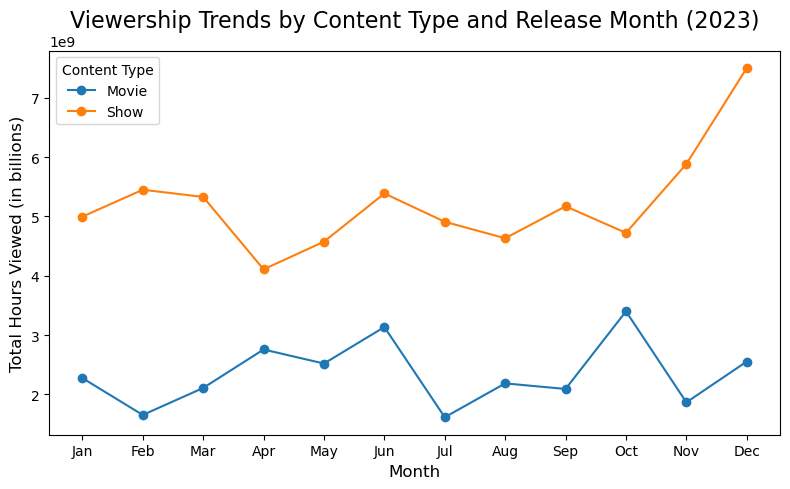

In [8]:
netflix_data['Release Date'] = pd.to_datetime(netflix_data['Release Date'])
netflix_data['Release Month'] = netflix_data['Release Date'].dt.month

monthly_viewership_by_type = netflix_data.pivot_table(index='Release Month',
                                                      columns='Content Type',
                                                      values='Hours Viewed',
                                                      aggfunc='sum')

plt.figure(figsize=(8, 5))

for content_type in monthly_viewership_by_type.columns:
    plt.plot(monthly_viewership_by_type.index, 
             monthly_viewership_by_type[content_type], 
             marker='o', 
             label=content_type)

plt.title('Viewership Trends by Content Type and Release Month (2023)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Hours Viewed (in billions)', fontsize=12)

plt.xticks(ticks=list(range(1, 13)), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.legend(title='Content Type')

plt.tight_layout()  
plt.show()

#### The graph compares viewership trends between movies and shows throughout 2023. It shows that shows consistently have higher viewership than movies, peaking in December. Movies have more fluctuating viewership, with notable increases in June and October. This indicates that Netflix’s audience engages more with shows across the year, while movie viewership experiences occasional spikes, possibly linked to specific releases or events.

#### The total viewership hours distributed across different release seasons

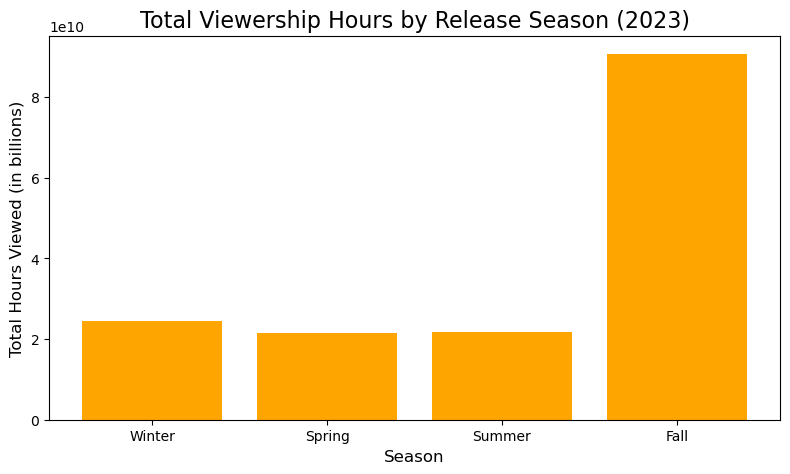

In [9]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

netflix_data['Release Season'] = netflix_data['Release Month'].apply(get_season)

seasonal_viewership = netflix_data.groupby('Release Season')['Hours Viewed'].sum()

seasons_order = ['Winter', 'Spring', 'Summer', 'Fall']
seasonal_viewership = seasonal_viewership.reindex(seasons_order)

plt.figure(figsize=(8, 5))
plt.bar(seasonal_viewership.index, seasonal_viewership.values, color='orange')

plt.title('Total Viewership Hours by Release Season (2023)', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Hours Viewed (in billions)', fontsize=12)

plt.xticks(rotation=0) 
plt.tight_layout() 
plt.show()

#### The graph indicates that viewership hours peak significantly in the Fall season, with over 80 billion hours viewed, while Winter, Spring, and Summer each have relatively stable and similar viewership around the 20 billion mark. This suggests that Netflix experiences the highest audience engagement during the Fall.

#### Analyzing the number of content releases and their viewership hours across months

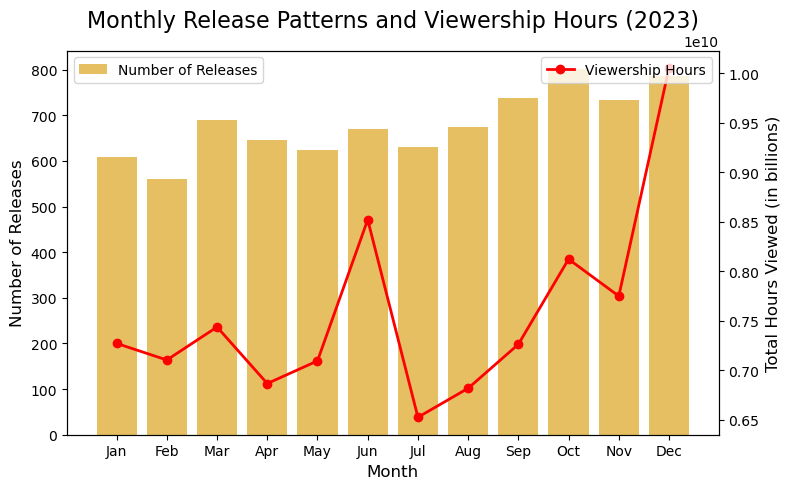

In [10]:
monthly_releases = netflix_data['Release Month'].value_counts().sort_index()
monthly_viewership = netflix_data.groupby('Release Month')['Hours Viewed'].sum()

fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.bar(monthly_releases.index, monthly_releases.values, color='goldenrod', alpha=0.7, label='Number of Releases')
ax1.set_ylabel('Number of Releases', fontsize=12)
ax1.set_xlabel('Month', fontsize=12)

ax1.set_xticks(list(range(1, 13)))
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

ax2 = ax1.twinx()  
ax2.plot(monthly_viewership.index, monthly_viewership.values, color='red', marker='o', label='Viewership Hours', linewidth=2)
ax2.set_ylabel('Total Hours Viewed (in billions)', fontsize=12)

ax1.grid(False) 
ax2.grid(False)  
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Monthly Release Patterns and Viewership Hours (2023)', fontsize=16)

plt.tight_layout() 
plt.show()

#### While the number of releases is relatively steady throughout the year, viewership hours experience a sharp increase in June and a significant rise in December, despite a stable release count. This indicates that viewership is not solely dependent on the number of releases but influenced by the timing and appeal of specific content during these months.

#### Exploring whether Netflix has a preference for releasing content on specific weekdays and how this influences viewership patterns

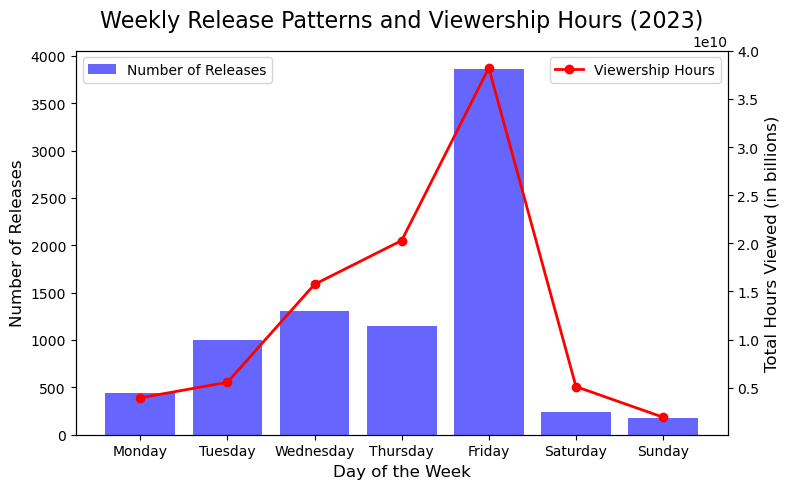

In [11]:
netflix_data['Release Day'] = netflix_data['Release Date'].dt.day_name()

weekday_releases = netflix_data['Release Day'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

weekday_viewership = netflix_data.groupby('Release Day')['Hours Viewed'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.bar(weekday_releases.index, weekday_releases.values, color='blue', alpha=0.6, label='Number of Releases')
ax1.set_ylabel('Number of Releases', fontsize=12)
ax1.set_xlabel('Day of the Week', fontsize=12)

ax2 = ax1.twinx()  
ax2.plot(weekday_viewership.index, weekday_viewership.values, color='red', marker='o', label='Viewership Hours', linewidth=2)
ax2.set_ylabel('Total Hours Viewed (in billions)', fontsize=12)

ax1.grid(False) 
ax2.grid(False)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Weekly Release Patterns and Viewership Hours (2023)', fontsize=16)

plt.tight_layout() 
plt.show()

#### The graph highlights that most content releases occur on Fridays, with viewership hours also peaking significantly on that day. This suggests that Netflix strategically releases content toward the weekend to maximize audience engagement. The viewership drops sharply on Saturdays and Sundays, despite some releases, indicating that the audience tends to consume newly released content right at the start of the weekend, which makes Friday the most impactful day for both releases and viewership.

#### Exploring specific high-impact dates, such as holidays or major events, and their correlation with content releases

In [12]:
important_dates = [
    '2023-01-01',  
    '2023-02-14',  
    '2023-07-04', 
    '2023-10-31', 
    '2023-12-25'  
]

important_dates = pd.to_datetime(important_dates)

holiday_releases = netflix_data[netflix_data['Release Date'].apply(
    lambda x: any((x - date).days in range(-3, 4) for date in important_dates)
)]

holiday_viewership = holiday_releases.groupby('Release Date')['Hours Viewed'].sum()

holiday_releases[['Title', 'Release Date', 'Hours Viewed']]

,Title,Release Date,Hours Viewed
2,The Glory: Season 1 // 더 글로리: 시즌 1,2022-12-30,622800000.0
6,La Reina del Sur: Season 3,2022-12-30,429600000.0
11,Kaleidoscope: Limited Series,2023-01-01,252500000.0
29,Perfect Match: Season 1,2023-02-14,176800000.0
124,Lady Voyeur: Limited Series // Olhar Indiscret...,2022-12-31,86000000.0
...,...,...,...
22324,The Romantics: Limited Series,2023-02-14,1000000.0
22327,Aggretsuko: Season 5 // アグレッシブ烈子: シーズン5,2023-02-16,900000.0
22966,The Lying Life of Adults: Limited Series // La...,2023-01-04,900000.0
22985,Community Squad: Season 1 // División Palermo:...,2023-02-17,800000.0


#### The data reveals that Netflix has strategically released content around key holidays and events.

#### Conclusion: The content strategy of Netflix revolves around maximizing viewership through targeted release timing and content variety. Shows consistently outperform movies in viewership, with significant spikes in December and June, indicating strategic releases around these periods. The Fall season stands out as the peak time for audience engagement. Most content is released on Fridays, which aims to capture viewers right before the weekend, and viewership aligns strongly with this release pattern. While the number of releases is steady throughout the year, viewership varies, which suggests a focus on high-impact titles and optimal release timing over sheer volume.